<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузим-данные-и-выполним-их-ресемплирование-по-одному-часу." data-toc-modified-id="Загрузим-данные-и-выполним-их-ресемплирование-по-одному-часу.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузим данные и выполним их ресемплирование по одному часу.</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Cоздадим-функцию-для-создания-признаков" data-toc-modified-id="Cоздадим-функцию-для-создания-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cоздадим функцию для создания признаков</a></span></li><li><span><a href="#Разделим-на-выборки.-Сделаем-тестовую-выборку-размером-10%-от-исходных-данных" data-toc-modified-id="Разделим-на-выборки.-Сделаем-тестовую-выборку-размером-10%-от-исходных-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Разделим на выборки. Сделаем тестовую выборку размером 10% от исходных данных</a></span></li><li><span><a href="#Обучим-модель-LinearRegression" data-toc-modified-id="Обучим-модель-LinearRegression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучим модель LinearRegression</a></span></li><li><span><a href="#Обучим-модель-RandomForestRegressor" data-toc-modified-id="Обучим-модель-RandomForestRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Обучим модель RandomForestRegressor</a></span></li><li><span><a href="#Обучим-модель-LGBMRegressor" data-toc-modified-id="Обучим-модель-LGBMRegressor-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Обучим модель LGBMRegressor</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Протестируем-лучшую-модель-на-тестовой-выборке" data-toc-modified-id="Протестируем-лучшую-модель-на-тестовой-выборке-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Протестируем лучшую модель на тестовой выборке</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

# План работы

1. Подготовка:
    * Загрузим данные и выполним их ресемплирование по одному часу.
2. Анализ:
3. Обучение:
    * Обучим разные модели с различными гиперпараметрами. Сделаем тестовую выборку размером 10% от исходных данных.
4. Тестирование
    * Проверим данные на тестовой выборке и сделаем выводы.



## Подготовка

### Загрузим данные и выполним их ресемплирование по одному часу.

In [1]:
import pandas as pd
import numpy as np
import lightgbm 
from lightgbm import LGBMRegressor
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit


In [2]:
df = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col=[0])

In [3]:
df = df.resample('1H').sum()

In [4]:
display(df.head())
print('-'*28)
print(df.info())
print('-'*28)
display(df.describe())
print('-'*28)
print('Количество пропусков', df.isna().sum())


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


----------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB
None
----------------------------


,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


----------------------------
Количество пропусков num_orders    0
dtype: int64


In [5]:
df = df.sort_index()

In [6]:
print(df.index.is_monotonic)

True


## Анализ

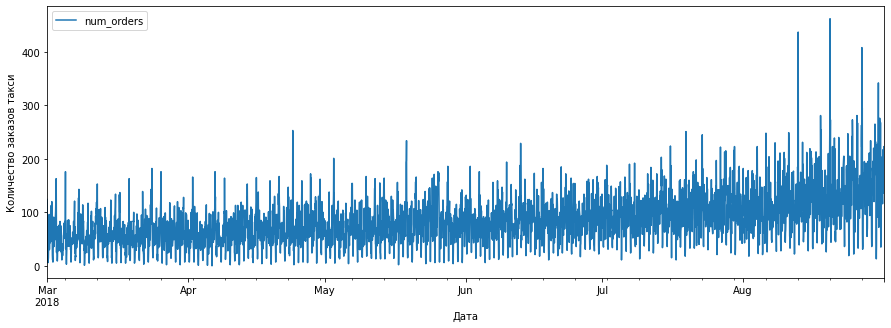

In [7]:
df.plot(figsize=(15,5))
plt.xlabel('Дата')
plt.ylabel('Количество заказов такси')
plt.legend()
plt.show()

In [8]:
decomposed = seasonal_decompose(df) #декомпозируем 

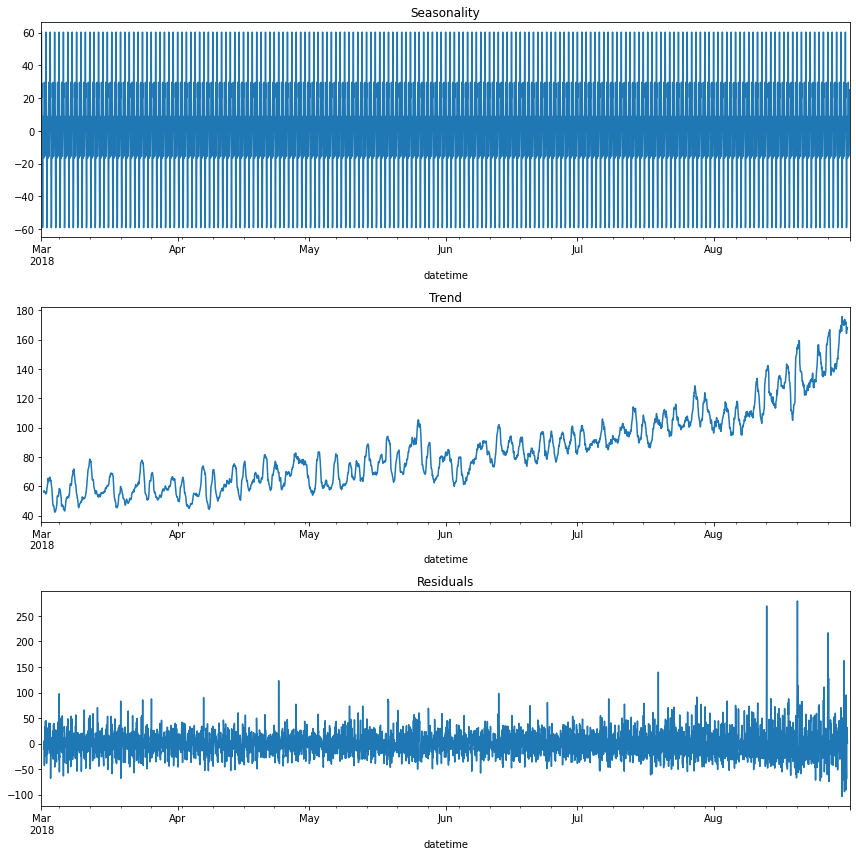

In [9]:
plt.figure(figsize=(12, 12))
plt.subplot(311)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(312)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

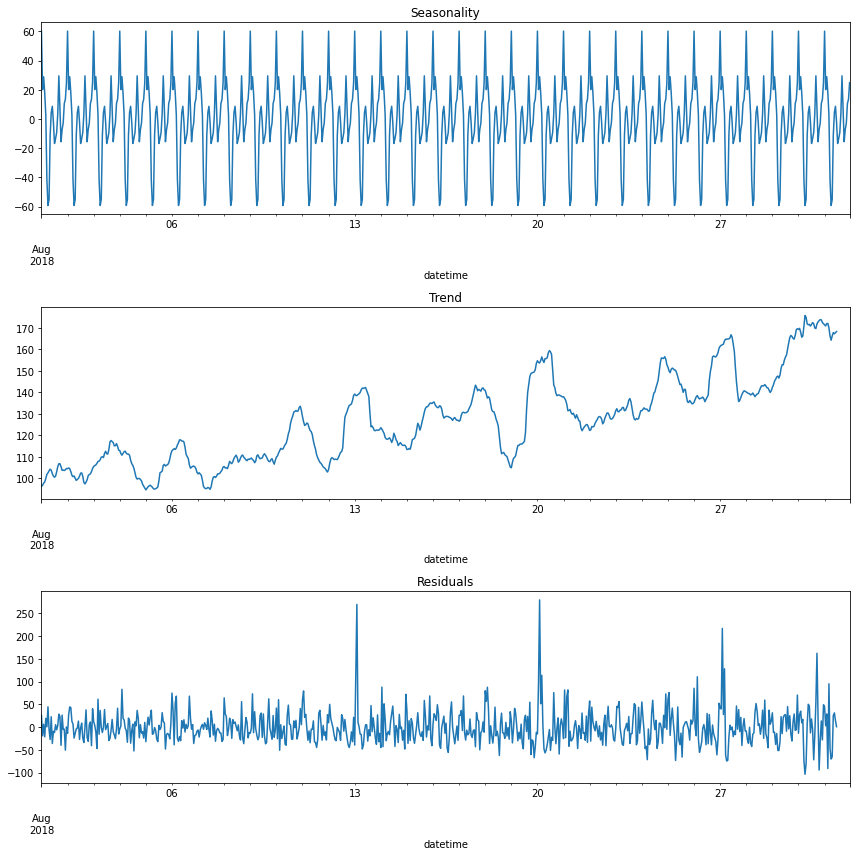

In [10]:
plt.figure(figsize=(12, 12))
plt.subplot(311)
decomposed.seasonal['2018-08-01':'2018-08-31'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(312)
decomposed.trend['2018-08-01':'2018-08-31'].plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(313)
decomposed.resid['2018-08-01':'2018-08-31'].plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Виден тренд на увеличение заказов в течение августа

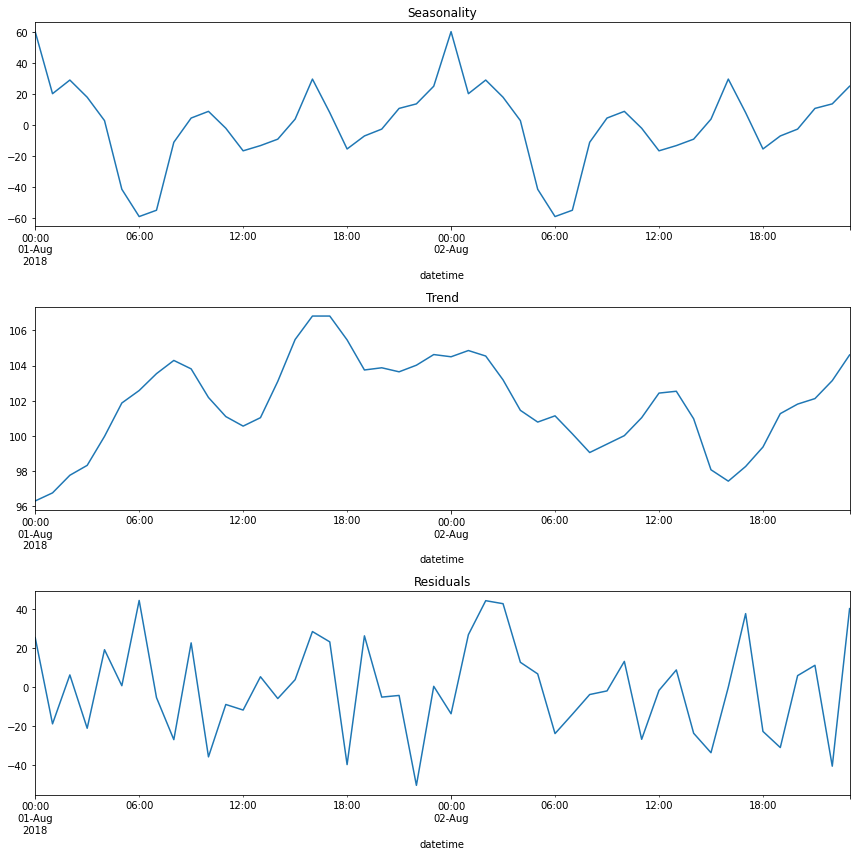

In [11]:
plt.figure(figsize=(12, 12))
plt.subplot(311)
decomposed.seasonal['2018-08-01':'2018-08-02'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(312)
decomposed.trend['2018-08-01':'2018-08-02'].plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(313)
decomposed.resid['2018-08-01':'2018-08-02'].plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

В течение суток видно что пик заказов приходится на 00:00, а меньше всего в 06:00

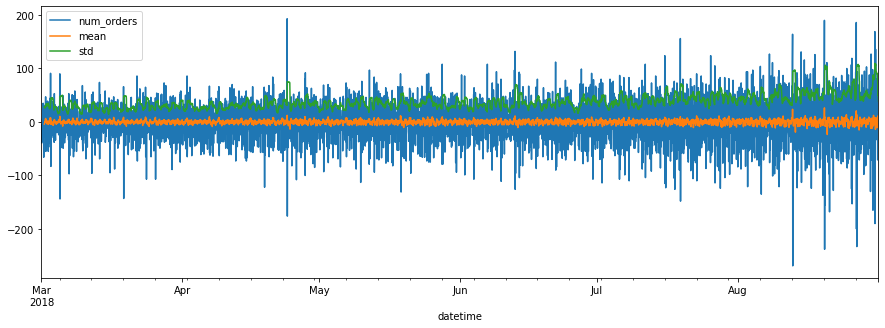

In [12]:
df_shift = df - df.shift()
df_shift['mean'] = df_shift['num_orders'].rolling(15).mean()
df_shift['std'] = df_shift['num_orders'].rolling(15).std()
df_shift.plot(figsize=(15,5))
plt.show()

Ряд достаточно стационарен

## Обучение

### Cоздадим функцию для создания признаков

In [14]:
def make_features(df, max_lag, rolling_mean_size):
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.dayofweek

    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)# 

    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()

In [15]:
make_features(df, 24, 10)
print(df.head())

                     num_orders  dayofweek  hour  lag_1  lag_2  lag_3  lag_4  \
datetime                                                                       
2018-03-01 00:00:00         124          3     3    NaN    NaN    NaN    NaN   
2018-03-01 01:00:00          85          3     3  124.0    NaN    NaN    NaN   
2018-03-01 02:00:00          71          3     3   85.0  124.0    NaN    NaN   
2018-03-01 03:00:00          66          3     3   71.0   85.0  124.0    NaN   
2018-03-01 04:00:00          43          3     3   66.0   71.0   85.0  124.0   

                     lag_5  lag_6  lag_7  ...  lag_16  lag_17  lag_18  lag_19  \
datetime                                  ...                                   
2018-03-01 00:00:00    NaN    NaN    NaN  ...     NaN     NaN     NaN     NaN   
2018-03-01 01:00:00    NaN    NaN    NaN  ...     NaN     NaN     NaN     NaN   
2018-03-01 02:00:00    NaN    NaN    NaN  ...     NaN     NaN     NaN     NaN   
2018-03-01 03:00:00    NaN    NaN 

In [16]:
df.dropna(inplace=True) #удалим пропуски

In [17]:
df.head() #проверим

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-02 00:00:00,90,4,4,58.0,113.0,66.0,61.0,45.0,73.0,44.0,...,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,61.7
2018-03-02 01:00:00,120,4,4,90.0,58.0,113.0,66.0,61.0,45.0,73.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,65.9
2018-03-02 02:00:00,75,4,4,120.0,90.0,58.0,113.0,66.0,61.0,45.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,71.3
2018-03-02 03:00:00,64,4,4,75.0,120.0,90.0,58.0,113.0,66.0,61.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,74.5
2018-03-02 04:00:00,20,4,4,64.0,75.0,120.0,90.0,58.0,113.0,66.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,76.5


### Разделим на выборки. Сделаем тестовую выборку размером 10% от исходных данных

In [19]:
train, test = train_test_split(df, shuffle=False, test_size=0.1)

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
 
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

print(train.shape)
print(test.shape)

(3952, 28)
(440, 28)


### Обучим модель LinearRegression

In [20]:
%%time

model_lr = LinearRegression()
model_lr.fit(features_train, target_train)
prediction_train_lr = model_lr.predict(features_train)
prediction_test_lr = model_lr.predict(features_test)
print('RMSE на обучающей выборке:', mean_squared_error(target_train, prediction_train_lr)**0.5)
print('RMSE на тестовой выборке:', mean_squared_error(target_test, prediction_test_lr)**0.5)

RMSE на обучающей выборке: 25.952101481643464
RMSE на тестовой выборке: 45.03196819312397
CPU times: user 127 ms, sys: 190 ms, total: 317 ms
Wall time: 221 ms


### Обучим модель RandomForestRegressor

In [21]:
%%time

for depth in range(2, 20, 2):
    model_rf = RandomForestRegressor(random_state=42, max_depth = depth)
    model_rf.fit(features_train, target_train)
    prediction_train_rf = model_rf.predict(features_train)
    prediction_test_rf = model_rf.predict(features_test)
    
    print('Глубина:', depth)
    print('RMSE на обучающей выборке:', mean_squared_error(target_train, prediction_train_rf)**0.5)
    print('RMSE на тестовой выборке:', mean_squared_error(target_test, prediction_test_rf)**0.5)
    print('-'*28)
print()

Глубина: 2
RMSE на обучающей выборке: 28.17189687710774
RMSE на тестовой выборке: 62.832284177810564
----------------------------
Глубина: 4
RMSE на обучающей выборке: 25.022986245753806
RMSE на тестовой выборке: 48.711883078064275
----------------------------
Глубина: 6
RMSE на обучающей выборке: 21.65849971748295
RMSE на тестовой выборке: 44.51200486371903
----------------------------
Глубина: 8
RMSE на обучающей выборке: 17.999970681743672
RMSE на тестовой выборке: 43.00572877308429
----------------------------
Глубина: 10
RMSE на обучающей выборке: 14.650449851358967
RMSE на тестовой выборке: 42.482343425200426
----------------------------
Глубина: 12
RMSE на обучающей выборке: 12.091783251567273
RMSE на тестовой выборке: 42.19373155044098
----------------------------
Глубина: 14
RMSE на обучающей выборке: 10.460572922097466
RMSE на тестовой выборке: 42.70807626662086
----------------------------
Глубина: 16
RMSE на обучающей выборке: 9.53550397064924
RMSE на тестовой выборке: 42.1

Лучший показатель у глубины 14

In [22]:
%%time

for est in [100, 200, 300]:
    model_rf = RandomForestRegressor(random_state=42, n_estimators=est, max_depth=16)
    model_rf.fit(features_train, target_train)
    prediction_train_rf = model_rf.predict(features_train)
    prediction_test_rf = model_rf.predict(features_test)

    print('Количество деревьев:', est)
    print('RMSE на обучающей выборке:', mean_squared_error(target_train, prediction_train_rf)**0.5)
    print('RMSE на тестовой выборке:', mean_squared_error(target_test, prediction_test_rf)**0.5)
    print('-'*28)
print()

Количество деревьев: 100
RMSE на обучающей выборке: 9.53550397064924
RMSE на тестовой выборке: 42.14000864476721
----------------------------
Количество деревьев: 200
RMSE на обучающей выборке: 9.389735608095327
RMSE на тестовой выборке: 42.18764417433001
----------------------------
Количество деревьев: 300
RMSE на обучающей выборке: 9.380611841861569
RMSE на тестовой выборке: 42.52417779856479
----------------------------

CPU times: user 31.1 s, sys: 116 ms, total: 31.2 s
Wall time: 31.2 s


Лучший показатель у количества деревьев 100

### Обучим модель LGBMRegressor

In [86]:
param_grid = {'n_estimators': [100, 200, 300], 'num_leaves': [n for n in range(50, 200, 50)]}

In [88]:
%%time

model_lgb = LGBMRegressor(random_state=42)

tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(
    estimator=model_lgb, param_grid=param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=tscv, verbose=1
)

model_lgb.fit(features_train, target_train)
prediction_train_lgb = model_lgb.predict(features_train)
prediction_test_lgb = model_lgb.predict(features_test)

CPU times: user 53.3 s, sys: 450 ms, total: 53.7 s
Wall time: 54.1 s


In [91]:
print('RMSE на обучающей выборке:', mean_squared_error(target_train, prediction_train_lgb)**0.5)
print('RMSE на тестовой выборке:', mean_squared_error(target_test, prediction_test_lgb)**0.5)

RMSE на обучающей выборке: 12.670186516665877
RMSE на тестовой выборке: 41.94060645652806


Лучший результат показала модель LGBMRegressor с RMSE = 41.94

## Тестирование

### Протестируем лучшую модель на тестовой выборке

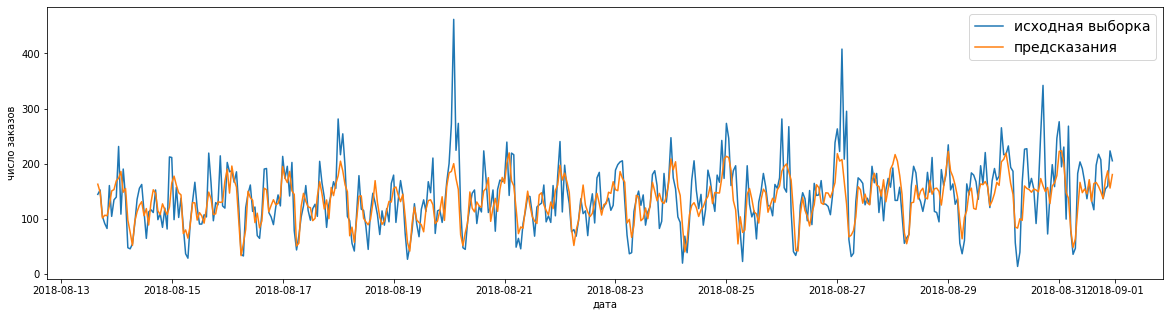

In [102]:
prediction_test = pd.Series(prediction_test_lgb, index=target_test.index)
prediction_test = 
plt.figure(figsize=(20,5))
plt.xlabel('дата')
plt.ylabel('число заказов')
plt.plot(target_test, label='исходная выборка')
plt.plot(prediction_test, label='предсказания')
plt.legend(fontsize=14)
plt.show()